FPQ-learner vs kuhn with fixed strategy

In [38]:
import numpy as np

from engine import KUHN
from agent_kuhn import kuhnAgent2, FPLearningAgent

In [39]:
N_EXP = 10

r0ss = []
r1ss = []

In [40]:
for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.96

    # Reward matrix for the Chicken game
    env = KUHN(max_steps=10, batch_size=1)
    action_space = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
    enemy_action_space = np.array([0,1])
    n_states = 3
    ##
    P2 = kuhnAgent2(enemy_action_space, zeta=0.3, eta=0.1)
    P1 = FPLearningAgent(action_space, enemy_action_space, n_states, learning_rate=0.3, epsilon=0.1, gamma=0.96)


    
    n_iter = 1000
    cards = env.reset()
        
    


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act(cards)
            a2 = P2.act(cards[1], a1[2])
            actions = [a1, a2]

            # World changes
            new_cards, rewards, done =  env.step(actions, cards)

            # Agents learn

            P1.update(cards, actions, rewards, new_cards)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])
            cards = new_cards

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

0
1
2
3
4
5
6
7
8
9


In [41]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

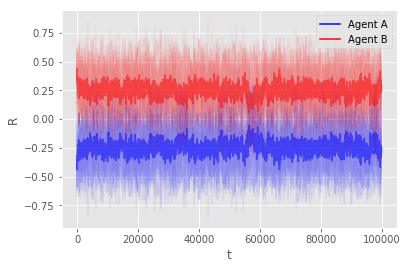

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

#plt.axis([0, max_steps*n_iter, -4.5, 1.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)

plt.xlabel('t');
plt.ylabel('R');

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='b'),
                Line2D([0], [0], color='r')]

plt.legend(custom_lines,['Agent A', 'Agent B']);